In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By

import re
import pandas as pd
import time
import requests
import datetime

## 식당 크롤링

### 비건식당

In [305]:
url='https://www.google.com/search?q=%EB%B9%84%EA%B1%B4%EC%8B%9D%EB%8B%B9&rlz=1C1JJTC_koKR1000KR1000&biw=1397&bih=626&sz=0&tbm=lcl&ei=gS8QZNzVJvK32roPx-m5cA&ved=0ahUKEwicmo_H_9r9AhXym1YBHcd0Dg4Q4dUDCAk&uact=5&oq=%EB%B9%84%EA%B1%B4%EC%8B%9D%EB%8B%B9&gs_lcp=Cg1nd3Mtd2l6LWxvY2FsEAMyBAgAEEMyBQgAEIAEMgUIABCABDIFCAAQgAQyBggAEAUQHjIGCAAQBRAeMgYIABAFEB4yBggAEAUQHjIGCAAQBRAeMgYIABAFEB5QAFgAYLMXaAJwAHgAgAFuiAHVAZIBAzAuMpgBAMABAQ&sclient=gws-wiz-local#rlfi=hd:;si:;mv:[[37.6822436,127.26746670000001],[37.469152199999996,126.88687449999999]];tbs:lrf:!1m4!1u3!2m2!3m1!1e1!1m4!1u2!2m2!2m1!1e1!2m1!1e2!2m1!1e3!3sIAE,lf:1,lf_ui:9'
driver=webdriver.Chrome()
driver.get(url)
act=ActionChains(driver)
driver.maximize_window()

In [57]:
name=[]
mean_star=[]
location=[]
try:
    while(1):
        for i in range(20):
            # 이름, 평균리뷰, 위치 크롤링
            html=driver.page_source
            soup=BeautifulSoup(html,'html.parser')
            for idx, info in enumerate(soup.select('div.rllt__details')[i]):
                if idx==0:
                    name.append(info.text)
                elif idx==1:
                    mean_star.append(info.text)
                elif idx==2:
                    location.append(info.text)

        # 페이지 이동
        driver.find_elements(By.CSS_SELECTOR,'#pnnext > span:nth-child(2)')[0].click()
        time.sleep(1)

        # break문
        if len(name)>1000:
            break
        
        # 진행상황
        if len(name)%20==0:
            print(len(name))
except:
    print('end')

20
40
60
80
100
120
140
160
end


In [58]:
df=pd.DataFrame({'name':name,'mean star':mean_star,'location':location})
df

,name,mean star,location
0,러브 더 비건즈,리뷰 없음 · 채식,호평동 642-2
1,망향비빔국수,4.2(20) · 음식점,호평동 늘을2로14번길 29
2,마히나 비건 테이블 Mahina Vegan Table,4.2(43) · 채식(Vegan),서울특별시 강남구
3,밥풀꽃,리뷰 없음 · 채식(Vegan),서울특별시
4,초록뜰,4.2(109) · ₩ · 채식(Vegan),서울특별시 동대문구
...,...,...,...
163,베지야끼,리뷰 없음 · 음식점,경기도 의정부시
164,채식코스요리전문점&굴,리뷰 없음 · 한식,서울특별시 송파구
165,구내식당,리뷰 없음 · 음식점,서울특별시
166,지구샵 그로서리 Jigushop Grocery,3.0(2) · 식료품점,서울특별시 마포구


In [59]:
df.to_csv('./data/vegan_restaurant_noreview.csv',encoding='utf-8-sig',index=False)

### 비건식당 주소 자세히

In [ ]:
url='https://www.google.com/search?q=%EB%B9%84%EA%B1%B4%EC%8B%9D%EB%8B%B9&rlz=1C1JJTC_koKR1000KR1000&biw=1397&bih=626&sz=0&tbm=lcl&ei=gS8QZNzVJvK32roPx-m5cA&ved=0ahUKEwicmo_H_9r9AhXym1YBHcd0Dg4Q4dUDCAk&uact=5&oq=%EB%B9%84%EA%B1%B4%EC%8B%9D%EB%8B%B9&gs_lcp=Cg1nd3Mtd2l6LWxvY2FsEAMyBAgAEEMyBQgAEIAEMgUIABCABDIFCAAQgAQyBggAEAUQHjIGCAAQBRAeMgYIABAFEB4yBggAEAUQHjIGCAAQBRAeMgYIABAFEB5QAFgAYLMXaAJwAHgAgAFuiAHVAZIBAzAuMpgBAMABAQ&sclient=gws-wiz-local#rlfi=hd:;si:;mv:[[37.6822436,127.26746670000001],[37.469152199999996,126.88687449999999]];tbs:lrf:!1m4!1u3!2m2!3m1!1e1!1m4!1u2!2m2!2m1!1e1!2m1!1e2!2m1!1e3!3sIAE,lf:1,lf_ui:9'
driver=webdriver.Chrome()
driver.get(url)
act=ActionChains(driver)
driver.maximize_window()

In [63]:
star=[]
name=[]
address=[]
try:
    while(1):
        for i in range(0,20):
            # 가게이름, 별점
            html=driver.page_source
            soup=BeautifulSoup(html,'html.parser')
            for idx, info in enumerate(soup.select('div.rllt__details')[i]):
                if idx==0:
                    name.append(info.text)
                elif idx==1:
                    star.append(info.text)

            # 상세페이지 열기
            driver.find_elements(By.CSS_SELECTOR,'div.uMdZh.tIxNaf>div>div>a>div>div')[i].click()
            time.sleep(1)

            # 주소
            html=driver.page_source
            soup=BeautifulSoup(html,'html.parser')
            address.append(soup.select('span.LrzXr')[0].text)

        # 페이지 이동
        driver.find_elements(By.CSS_SELECTOR,'#pnnext > span:nth-child(2)')[0].click()
        time.sleep(1)

        # break문
        if len(name)>1000:
            break
        
        # 진행상황
        if len(name)%20==0:
            print(len(name))
except:
    print('end')

20
40
60
80
100
120
140
160
end


In [65]:
df2=pd.DataFrame({'name':name,'address':address,'star':star})
df2

,name,address,star
0,러브 더 비건즈,경기도 남양주시 호평동 642-2,리뷰 없음 · 채식
1,망향비빔국수,경기도 남양주시 호평동 늘을2로14번길 29,4.2(20) · 음식점
2,마히나 비건 테이블 Mahina Vegan Table,서울특별시 강남구 논현로175길 75 2층,4.2(43) · 채식(Vegan)
3,밥풀꽃,상계동 966-1번지 1층 송현빌딩 노원구 서울특별시 KR,리뷰 없음 · 채식(Vegan)
4,초록뜰,서울특별시 동대문구 망우로18길 6 2층,4.2(109) · ₩ · 채식(Vegan)
...,...,...,...
163,베지야끼,경기도 의정부시 의정부동 173-7,리뷰 없음 · 음식점
164,채식코스요리전문점&굴,서울특별시 송파구 문정동 61-13,리뷰 없음 · 한식
165,구내식당,암사동 488-17번지 1층 강동구 서울특별시 KR,리뷰 없음 · 음식점
166,지구샵 그로서리 Jigushop Grocery,서울특별시 마포구 연남로 93,3.0(2) · 식료품점


In [8]:
name_lst=[]
for name in vegan['name']:
    name_lst.append(name.replace(' ','+'))

url_lst=[]
for name in name_lst:
    url='https://www.google.com/maps/place/'+name
    driver=webdriver.Chrome()
    driver.get(url)
    act=ActionChains(driver)
    time.sleep(3)
    driver.find_elements(By.CSS_SELECTOR,'#searchbox-searchbutton')[0].click()
    time.sleep(3)
    url_lst.append(driver.current_url)
    driver.close()

In [9]:
vegan['url']=url_lst
vegan.head()

,name,address,star,vegan,url
0,러브 더 비건즈,경기도 남양주시 호평동 642-2,리뷰 없음 · 채식,1,https://www.google.com/maps/place/%EB%9F%AC%EB...
1,망향비빔국수,경기도 남양주시 호평동 늘을2로14번길 29,4.2(20) · 음식점,1,https://www.google.com/maps/search/%EB%A7%9D%E...
2,마히나 비건 테이블 Mahina Vegan Table,서울특별시 강남구 논현로175길 75 2층,4.2(43) · 채식(Vegan),1,https://www.google.com/maps/place/%EB%A7%88%ED...
3,밥풀꽃,상계동 966-1번지 1층 송현빌딩 노원구 서울특별시 KR,리뷰 없음 · 채식(Vegan),1,https://www.google.com/maps/search/%EB%B0%A5%E...
4,초록뜰,서울특별시 동대문구 망우로18길 6 2층,4.2(109) · ₩ · 채식(Vegan),1,https://www.google.com/maps/place/%EC%B4%88%EB...


In [10]:
vegan.to_csv('./data/vegan_restaurant_noreview_detail.csv',encoding='utf-8-sig',index=False)

### 페스코식당

In [328]:
url='https://www.google.com/search?q=%ED%8E%98%EC%8A%A4%EC%BD%94%EC%8B%9D%EB%8B%B9&rlz=1C1JJTC_koKR1000KR1000&biw=930&bih=883&tbm=lcl&sxsrf=AJOqlzWbI3p5wm2o0goKFIbMCu8fi4ODXQ%3A1678864145037&ei=EW8RZLjUAcnt2roPiLmP8AE&ved=0ahUKEwj4oPansN39AhXJtlYBHYjcAx4Q4dUDCAk&uact=5&oq=%ED%8E%98%EC%8A%A4%EC%BD%94%EC%8B%9D%EB%8B%B9&gs_lcp=Cg1nd3Mtd2l6LWxvY2FsEAMyBAgjECc6BwgAEA0QgAQ6BggAEB4QDToICAAQHhANEA86BggAEAcQHjoNCAAQgAQQFBCHAhCxAzoKCAAQgAQQFBCHAjoKCAAQDRCABBCxAzoHCCMQsAIQJzoICAAQBxAeEA9QxhFYjmRgz2VoAnAAeAGAAXuIAe8IkgEEMC4xMJgBAKABAcABAQ&sclient=gws-wiz-local#rlfi=hd:;si:;mv:[[37.5809163,127.06709219999998],[37.4748877,126.8193913]];tbs:lrf:!1m4!1u3!2m2!3m1!1e1!1m4!1u2!2m2!2m1!1e1!2m1!1e2!2m1!1e3!3sIAE,lf:1,lf_ui:9'
driver=webdriver.Chrome()
driver.get(url)
act=ActionChains(driver)
driver.maximize_window()

In [329]:
star=[]
name=[]
address=[]
try:
    while(1):
        for i in range(0,20):
            # 가게이름, 별점
            html=driver.page_source
            soup=BeautifulSoup(html,'html.parser')
            for idx, info in enumerate(soup.select('div.rllt__details')[i]):
                if idx==0:
                    name.append(info.text)
                elif idx==1:
                    star.append(info.text)

            # 상세페이지 열기
            driver.find_elements(By.CSS_SELECTOR,'div.uMdZh.tIxNaf>div>div>a>div>div')[i].click()
            time.sleep(1)

            # 주소
            html=driver.page_source
            soup=BeautifulSoup(html,'html.parser')
            address.append(soup.select('span.LrzXr')[0].text)

        # 페이지 이동
        driver.find_elements(By.CSS_SELECTOR,'#pnnext > span:nth-child(2)')[0].click()
        time.sleep(1)

        # break문
        if len(name)>1000:
            break
        
        # 진행상황
        if len(name)%20==0:
            print(len(name))
except:
    print('end')

end


In [345]:
pesco=pd.DataFrame({'name':name,'address':address,'star':star})
pesco['pesco']='1'
pesco

,name,address,star,pesco
0,어라운드 그린,서울특별시 동교로 44-12nd floor,4.3(108) · ₩₩ · 채식(Vegan),1
1,몽크스 부처,서울특별시 용산구 한남동 이태원로 228-1,4.4(146) · 채식,1
2,로컬릿,서울특별시 성동구 한림말길 33 2층,4.2(137) · 음식점,1
3,오세계향,서울특별시 종로구 관훈동,4.3(735) · ₩₩ · 채식(Vegan),1
4,슬런치,서울특별시 마포구 와우산로3길 38,4.1(199) · ₩₩ · 음식점,1
5,옴레스토랑 광화문점,서울특별시 종로구 새문안로 103 지하,4.1(277) · 인도 요리,1
6,저스트텐동,서울특별시 마포구 연남동 228-25,4.3(269) · 튀김덮밥 전문점,1
7,쏘이마루,경기도 남양주시 화도읍 답내리,리뷰 없음 · 제조업체,1
8,리틀포레스트(Lifo),서울특별시 성동구 성수일로12길 23 2층,3.6(14) · 브런치,1
9,옥수해물찜칼국수,서울특별시 성동구 독서당로40길 37 2 층,4.1(712) · ₩₩ · 해산물 요리,1


In [4]:
#pesco=pd.read_csv('./data/pesco_restaurant.csv')

In [5]:
name_lst=[]
for name in pesco['name']:
    name_lst.append(name.replace(' ','+'))

url_lst=[]
for name in name_lst:
    url='https://www.google.com/maps/place/'+name
    driver=webdriver.Chrome()
    driver.get(url)
    act=ActionChains(driver)
    time.sleep(3)
    driver.find_elements(By.CSS_SELECTOR,'#searchbox-searchbutton')[0].click()
    time.sleep(3)
    url_lst.append(driver.current_url)
    driver.close()

pesco['url']=url_lst

In [6]:
pesco.to_csv('./data/pesco_restaurant.csv',index=False,encoding='utf-8-sig')

### 락토오보식당

In [335]:
url='https://www.google.com/search?q=%EB%9D%BD%ED%86%A0%EC%98%A4%EB%B3%B4%EC%8B%9D%EB%8B%B9&rlz=1C1JJTC_koKR1000KR1000&biw=930&bih=883&tbm=lcl&sxsrf=AJOqlzVYzsJ4jEhwO-bGXEotSx5_izRRsA%3A1678864161552&ei=IW8RZMybIbOk2roPtsqLoA4&ved=0ahUKEwiMsOavsN39AhUzklYBHTblAuQQ4dUDCAk&uact=5&oq=%EB%9D%BD%ED%86%A0%EC%98%A4%EB%B3%B4%EC%8B%9D%EB%8B%B9&gs_lcp=Cg1nd3Mtd2l6LWxvY2FsEAMyBQgAEKIEMgUIABCiBDoICAAQBxAeEA86BggAEAcQHjoECAAQQzoKCAAQgAQQFBCHAjoICAAQCBAHEB46CggAEAgQBxAeEA9QuQVY2BhggBtoAnAAeAKAAaIBiAH1DJIBBDAuMTOYAQCgAQHAAQE&sclient=gws-wiz-local#rlfi=hd:;si:;mv:[[37.82138930000001,127.54223959999999],[34.7853716,126.6084651]];tbs:lrf:!1m4!1u3!2m2!3m1!1e1!1m4!1u2!2m2!2m1!1e1!2m1!1e2!2m1!1e3!3sIAE,lf:1,lf_ui:9'
driver=webdriver.Chrome()
driver.get(url)
act=ActionChains(driver)
driver.maximize_window()

In [336]:
star=[]
name=[]
address=[]
try:
    while(1):
        for i in range(0,20):
            # 가게이름, 별점
            html=driver.page_source
            soup=BeautifulSoup(html,'html.parser')
            for idx, info in enumerate(soup.select('div.rllt__details')[i]):
                if idx==0:
                    name.append(info.text)
                elif idx==1:
                    star.append(info.text)

            # 상세페이지 열기
            driver.find_elements(By.CSS_SELECTOR,'div.uMdZh.tIxNaf>div>div>a>div>div')[i].click()
            time.sleep(1)

            # 주소
            html=driver.page_source
            soup=BeautifulSoup(html,'html.parser')
            address.append(soup.select('span.LrzXr')[0].text)

        # 페이지 이동
        driver.find_elements(By.CSS_SELECTOR,'#pnnext > span:nth-child(2)')[0].click()
        time.sleep(1)

        # break문
        if len(name)>1000:
            break
        
        # 진행상황
        if len(name)%20==0:
            print(len(name))
except:
    print('end')

end


In [346]:
lactoovo=pd.DataFrame({'name':name,'address':address,'star':star})
lactoovo['lacto_ovo']='1'
lactoovo

,name,address,star,lacto_ovo
0,어라운드 그린,서울특별시 동교로 44-12nd floor,4.3(108) · ₩₩ · 채식(Vegan),1
1,몽크스 부처,서울특별시 용산구 한남동 이태원로 228-1,4.4(146) · 채식,1
2,로컬릿,서울특별시 성동구 한림말길 33 2층,4.2(137) · 음식점,1
3,오세계향,서울특별시 종로구 관훈동,4.3(735) · ₩₩ · 채식(Vegan),1
4,슬런치,서울특별시 마포구 와우산로3길 38,4.1(199) · ₩₩ · 음식점,1
5,옴레스토랑 광화문점,서울특별시 종로구 새문안로 103 지하,4.1(277) · 인도 요리,1
6,저스트텐동,서울특별시 마포구 연남동 228-25,4.3(269) · 튀김덮밥 전문점,1
7,쏘이마루,경기도 남양주시 화도읍 답내리,리뷰 없음 · 제조업체,1
8,리틀포레스트(Lifo),서울특별시 성동구 성수일로12길 23 2층,3.6(14) · 브런치,1
9,옥수해물찜칼국수,서울특별시 성동구 독서당로40길 37 2 층,4.1(712) · ₩₩ · 해산물 요리,1


In [7]:
#lactoovo=pd.read_csv('./data/lacto_ovo_restaurant.csv')

In [8]:
name_lst=[]
for name in lactoovo['name']:
    name_lst.append(name.replace(' ','+'))

url_lst=[]
for name in name_lst:
    url='https://www.google.com/maps/place/'+name
    driver=webdriver.Chrome()
    driver.get(url)
    act=ActionChains(driver)
    time.sleep(3)
    driver.find_elements(By.CSS_SELECTOR,'#searchbox-searchbutton')[0].click()
    time.sleep(3)
    url_lst.append(driver.current_url)
    driver.close()

lactoovo['url']=url_lst

In [9]:
lactoovo.to_csv('./data/lacto_ovo_restaurant.csv',index=False,encoding='utf-8-sig')

## 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
vegan=pd.read_csv('./data/vegan_restaurant_noreview_detail.csv')
vegan['vegan']='1'
vegan

,name,address,star,vegan,url
0,러브 더 비건즈,경기도 남양주시 호평동 642-2,리뷰 없음 · 채식,1,https://www.google.com/maps/place/%EB%9F%AC%EB...
1,망향비빔국수,경기도 남양주시 호평동 늘을2로14번길 29,4.2(20) · 음식점,1,https://www.google.com/maps/search/%EB%A7%9D%E...
2,마히나 비건 테이블 Mahina Vegan Table,서울특별시 강남구 논현로175길 75 2층,4.2(43) · 채식(Vegan),1,https://www.google.com/maps/place/%EB%A7%88%ED...
3,밥풀꽃,상계동 966-1번지 1층 송현빌딩 노원구 서울특별시 KR,리뷰 없음 · 채식(Vegan),1,https://www.google.com/maps/search/%EB%B0%A5%E...
4,초록뜰,서울특별시 동대문구 망우로18길 6 2층,4.2(109) · ₩ · 채식(Vegan),1,https://www.google.com/maps/place/%EC%B4%88%EB...
...,...,...,...,...,...
163,베지야끼,경기도 의정부시 의정부동 173-7,리뷰 없음 · 음식점,1,https://www.google.com/maps/place/%EB%B2%A0%EC...
164,채식코스요리전문점&굴,서울특별시 송파구 문정동 61-13,리뷰 없음 · 한식,1,https://www.google.com/maps/place/%EC%B1%84%EC...
165,구내식당,암사동 488-17번지 1층 강동구 서울특별시 KR,리뷰 없음 · 음식점,1,https://www.google.com/maps/search/%EA%B5%AC%E...
166,지구샵 그로서리 Jigushop Grocery,서울특별시 마포구 연남로 93,3.0(2) · 식료품점,1,https://www.google.com/maps/place/%EC%A7%80%EA...


In [3]:
pesco=pd.read_csv('./data/pesco_restaurant.csv')
pesco

,name,address,star,pesco,url
0,어라운드 그린,서울특별시 동교로 44-12nd floor,4.3(108) · ₩₩ · 채식(Vegan),1,https://www.google.com/maps/place/%EC%96%B4%EB...
1,몽크스 부처,서울특별시 용산구 한남동 이태원로 228-1,4.4(146) · 채식,1,https://www.google.com/maps/place/%EB%AA%BD%ED...
2,로컬릿,서울특별시 성동구 한림말길 33 2층,4.2(137) · 음식점,1,https://www.google.com/maps/place/%EB%A1%9C%EC...
3,오세계향,서울특별시 종로구 관훈동,4.3(735) · ₩₩ · 채식(Vegan),1,https://www.google.com/maps/place/%EC%98%A4%EC...
4,슬런치,서울특별시 마포구 와우산로3길 38,4.1(199) · ₩₩ · 음식점,1,https://www.google.com/maps/place/%EC%8A%AC%EB...
5,옴레스토랑 광화문점,서울특별시 종로구 새문안로 103 지하,4.1(277) · 인도 요리,1,https://www.google.com/maps/place/%EC%98%B4%EB...
6,저스트텐동,서울특별시 마포구 연남동 228-25,4.3(269) · 튀김덮밥 전문점,1,https://www.google.com/maps/place/%EC%A0%80%EC...
7,쏘이마루,경기도 남양주시 화도읍 답내리,리뷰 없음 · 제조업체,1,https://www.google.com/maps/place/%EC%8F%98%EC...
8,리틀포레스트(Lifo),서울특별시 성동구 성수일로12길 23 2층,3.6(14) · 브런치,1,https://www.google.com/maps/place/%EB%A6%AC%ED...
9,옥수해물찜칼국수,서울특별시 성동구 독서당로40길 37 2 층,4.1(712) · ₩₩ · 해산물 요리,1,https://www.google.com/maps/place/%EC%98%A5%EC...


In [13]:
lactoovo=pd.read_csv('./data/lacto_ovo_restaurant.csv')
lactoovo

,name,address,star,lacto_ovo,url
0,어라운드 그린,서울특별시 동교로 44-12nd floor,4.3(108) · ₩₩ · 채식(Vegan),1,https://www.google.com/maps/place/%EC%96%B4%EB...
1,몽크스 부처,서울특별시 용산구 한남동 이태원로 228-1,4.4(146) · 채식,1,https://www.google.com/maps/place/%EB%AA%BD%ED...
2,로컬릿,서울특별시 성동구 한림말길 33 2층,4.2(137) · 음식점,1,https://www.google.com/maps/place/%EB%A1%9C%EC...
3,오세계향,서울특별시 종로구 관훈동,4.3(735) · ₩₩ · 채식(Vegan),1,https://www.google.com/maps/place/%EC%98%A4%EC...
4,슬런치,서울특별시 마포구 와우산로3길 38,4.1(199) · ₩₩ · 음식점,1,https://www.google.com/maps/place/%EC%8A%AC%EB...
5,옴레스토랑 광화문점,서울특별시 종로구 새문안로 103 지하,4.1(277) · 인도 요리,1,https://www.google.com/maps/place/%EC%98%B4%EB...
6,저스트텐동,서울특별시 마포구 연남동 228-25,4.3(269) · 튀김덮밥 전문점,1,https://www.google.com/maps/place/%EC%A0%80%EC...
7,쏘이마루,경기도 남양주시 화도읍 답내리,리뷰 없음 · 제조업체,1,https://www.google.com/maps/place/%EC%8F%98%EC...
8,리틀포레스트(Lifo),서울특별시 성동구 성수일로12길 23 2층,3.6(14) · 브런치,1,https://www.google.com/maps/place/%EB%A6%AC%ED...
9,옥수해물찜칼국수,서울특별시 성동구 독서당로40길 37 2 층,4.1(712) · ₩₩ · 해산물 요리,1,https://www.google.com/maps/place/%EC%98%A5%EC...


In [4]:
df=pd.concat([vegan,pesco])
df=df.drop_duplicates(subset=['name','address'],keep='first')
df.reset_index(drop=True,inplace=True)
df

,name,address,star,vegan,url,pesco
0,러브 더 비건즈,경기도 남양주시 호평동 642-2,리뷰 없음 · 채식,1,https://www.google.com/maps/place/%EB%9F%AC%EB...,NaN
1,망향비빔국수,경기도 남양주시 호평동 늘을2로14번길 29,4.2(20) · 음식점,1,https://www.google.com/maps/search/%EB%A7%9D%E...,NaN
2,마히나 비건 테이블 Mahina Vegan Table,서울특별시 강남구 논현로175길 75 2층,4.2(43) · 채식(Vegan),1,https://www.google.com/maps/place/%EB%A7%88%ED...,NaN
3,밥풀꽃,상계동 966-1번지 1층 송현빌딩 노원구 서울특별시 KR,리뷰 없음 · 채식(Vegan),1,https://www.google.com/maps/search/%EB%B0%A5%E...,NaN
4,초록뜰,서울특별시 동대문구 망우로18길 6 2층,4.2(109) · ₩ · 채식(Vegan),1,https://www.google.com/maps/place/%EC%B4%88%EB...,NaN
...,...,...,...,...,...,...
176,저스트텐동 송도트리플스트리트점,인천광역시 연수구 송도동 과학로16번길 33-1 트리플스트리트 A동 별관 2층 20...,4.0(32) · 일식,NaN,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0
177,저스트텐동 충북혁신도시점,충청북도 음성군 맹동면 대하2길 41 105호,4.2(29) · 일식,NaN,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0
178,저스트 텐동 청당점,충청남도 천안시 동남구 청당동 548-1,4.3(10) · 일식,NaN,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0
179,저스트텐동 포항점,경상북도 포항시 남구 이동 대이로189번길 5-1,4.0(52) · 일식당 및 일정식집,NaN,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0


In [5]:
star_lst=df['star'].str.split('·')
df['review']=star_lst.str.get(0)
df['type']=star_lst.str.get(-1)
df=df.drop('star',axis=1)

In [6]:
for idx in range(df.shape[0]):
    df['type'][idx]=re.sub('[^가-힣]','',df['type'][idx])
    df['review'][idx]=re.sub('\)','',df['review'][idx])

In [7]:
review_lst=df['review'].str.split('(')
df['star']=review_lst.str.get(0)
df['cnt']=review_lst.str.get(1)
df=df.drop('review',axis=1)

In [8]:
df['cnt'].fillna(0,inplace=True)
df

,name,address,vegan,url,pesco,type,star,cnt
0,러브 더 비건즈,경기도 남양주시 호평동 642-2,1,https://www.google.com/maps/place/%EB%9F%AC%EB...,NaN,채식,리뷰 없음,0
1,망향비빔국수,경기도 남양주시 호평동 늘을2로14번길 29,1,https://www.google.com/maps/search/%EB%A7%9D%E...,NaN,음식점,4.2,20
2,마히나 비건 테이블 Mahina Vegan Table,서울특별시 강남구 논현로175길 75 2층,1,https://www.google.com/maps/place/%EB%A7%88%ED...,NaN,채식,4.2,43
3,밥풀꽃,상계동 966-1번지 1층 송현빌딩 노원구 서울특별시 KR,1,https://www.google.com/maps/search/%EB%B0%A5%E...,NaN,채식,리뷰 없음,0
4,초록뜰,서울특별시 동대문구 망우로18길 6 2층,1,https://www.google.com/maps/place/%EC%B4%88%EB...,NaN,채식,4.2,109
...,...,...,...,...,...,...,...,...
176,저스트텐동 송도트리플스트리트점,인천광역시 연수구 송도동 과학로16번길 33-1 트리플스트리트 A동 별관 2층 20...,NaN,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식,4.0,32
177,저스트텐동 충북혁신도시점,충청북도 음성군 맹동면 대하2길 41 105호,NaN,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식,4.2,29
178,저스트 텐동 청당점,충청남도 천안시 동남구 청당동 548-1,NaN,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식,4.3,10
179,저스트텐동 포항점,경상북도 포항시 남구 이동 대이로189번길 5-1,NaN,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식당및일정식집,4.0,52


In [9]:
for idx in range(df.shape[0]):
    df['address'][idx]=re.sub(',',' ',df['address'][idx])
    df['address'][idx]=df['address'][idx].replace('KR','')
    df['address'][idx]=re.sub('\s+',' ',df['address'][idx]).strip()
    df['address'][idx]=df['address'][idx].replace('서울','서울특별시')
    df['address'][idx]=df['address'][idx].replace('특별시특별시','특별시')

In [10]:
def split_address1(address):
    for word in address.split(' '):
        if word in ['서울특별시','경기도','인천광역시','전라남도','충청남도','충청북도']:
            return word
        
df['address1']=df['address'].apply(split_address1)

In [11]:
def split_address2(address):
    if '서울특별시' in address or '인천광역시' in address:
        for word in address.split(' '):
            if '구' in word:
                return word
    elif '경상북도' in address:
        for word in address.split(' '):
            if '구' in word:
                return word
            elif '시' in word:
                return word
    elif '경기도' in address or '전라남도' in address or '충청남도' in address or '충청북도' in address:
        for word in address.split(' '):
            if '시' in word or '군' in word:
                return word
    else:
        return address

df['address2']=df['address'].apply(split_address2)

In [12]:
def split_address3(address):
    sub=[]
    if '서울특별시' in address or '인천광역시' in address:
        for word in address.split(' '):
            if '구' in word:
                word=''
            if len(word)>0:
                sub.append(word)
    elif '경상북도' in address:
        for word in address.split(' '):
            if '구' in word:
                word=''
            elif '시' in word:
                word=''
            if len(word)>0:
                sub.append(word)
    elif '경기도' in address or '전라남도' in address or '충청남도' in address or '충청북도' in address:
        for word in address.split(' '):
            if '시' in word or '군' in word:
                word=''
            if len(word)>0:
                sub.append(word)
    result=''
    for word in sub:
        if word in ['서울특별시','경기도','경상북도','전라남도','충청남도','충청북도']:
            pass
        else:
            result=result+' '+word
    return result.strip()

df['address3']=df['address'].apply(split_address3)
df=df.drop('address',axis=1)

In [13]:
df.isnull().sum()

name          0
vegan        13
url           0
pesco       168
type          0
star          0
cnt           0
address1      4
address2      3
address3      0
dtype: int64

In [14]:
df[df['address1'].isnull()]

,name,vegan,url,pesco,type,star,cnt,address1,address2,address3
99,러빙헛,1,https://www.google.com/maps/search/%EB%9F%AC%E...,NaN,음식점,4.0,28,None,안산시,
145,송정각,1,https://www.google.com/maps/search/%EC%86%A1%E...,NaN,중식,3.7,46,None,수원시,
179,저스트텐동 포항점,NaN,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식당및일정식집,4.0,52,None,포항시,이동 대이로189번길 5-1
180,러빙헛 채식뷔페점,NaN,https://www.google.com/maps/place/%EB%9F%AC%EB...,1.0,채식,3.7,3,None,포항시,이동 대이로189번길 5-1


In [15]:
df.loc[df['address2']=='포항시','address1']='경상북도'
df.loc[df['address1'].isnull(),'address1']='경기도'

In [16]:
df[df['address2'].isnull()]

,name,vegan,url,pesco,type,star,cnt,address1,address2,address3
16,어라운드 그린,1,https://www.google.com/maps/place/%EC%96%B4%EB...,NaN,채식,4.3,108,서울특별시,None,동교로 44-12nd floor
35,한과채,1,https://www.google.com/maps/place/%ED%95%9C%EA...,NaN,채식,4.3,85,서울특별시,None,
117,보리떡과물고기,1,https://www.google.com/maps/search/%EB%B3%B4%E...,NaN,음식점,리뷰 없음,0,서울특별시,None,


In [17]:
df.loc[df['name']=='어라운드 그린','address2']='마포구'
df.loc[df['name']=='보리떡과물고기','address2']='관악구'
df.loc[df['name']=='보리떡과물고기','type']='음식점'
df.loc[df['name']=='한과채','type']='채식'
df.loc[df['name']=='한과채','address2']='종로구'

In [18]:
df.loc[df['type']=='','type']='중식'

In [19]:
df=df.fillna('')
df

,name,vegan,url,pesco,type,star,cnt,address1,address2,address3
0,러브 더 비건즈,1,https://www.google.com/maps/place/%EB%9F%AC%EB...,,채식,리뷰 없음,0,경기도,남양주시,호평동 642-2
1,망향비빔국수,1,https://www.google.com/maps/search/%EB%A7%9D%E...,,음식점,4.2,20,경기도,남양주시,호평동 늘을2로14번길 29
2,마히나 비건 테이블 Mahina Vegan Table,1,https://www.google.com/maps/place/%EB%A7%88%ED...,,채식,4.2,43,서울특별시,강남구,논현로175길 75 2층
3,밥풀꽃,1,https://www.google.com/maps/search/%EB%B0%A5%E...,,채식,리뷰 없음,0,서울특별시,노원구,상계동 966-1번지 1층 송현빌딩
4,초록뜰,1,https://www.google.com/maps/place/%EC%B4%88%EB...,,채식,4.2,109,서울특별시,동대문구,망우로18길 6 2층
...,...,...,...,...,...,...,...,...,...,...
176,저스트텐동 송도트리플스트리트점,,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식,4.0,32,인천광역시,연수구,인천광역시 송도동 과학로16번길 33-1 트리플스트리트 A동 별관 2층 207-3호
177,저스트텐동 충북혁신도시점,,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식,4.2,29,충청북도,음성군,맹동면 대하2길 41 105호
178,저스트 텐동 청당점,,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식,4.3,10,충청남도,천안시,동남구 청당동 548-1
179,저스트텐동 포항점,,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식당및일정식집,4.0,52,경상북도,포항시,이동 대이로189번길 5-1


In [20]:
df['address']=''
for idx in range(df.shape[0]):
    df['address'][idx]=df['address1'][idx]+' '+df['address2'][idx]
df.rename({'address3':'sub_address'},axis=1,inplace=True)
df.head()

,name,vegan,url,pesco,type,star,cnt,address1,address2,sub_address,address
0,러브 더 비건즈,1,https://www.google.com/maps/place/%EB%9F%AC%EB...,,채식,리뷰 없음,0,경기도,남양주시,호평동 642-2,경기도 남양주시
1,망향비빔국수,1,https://www.google.com/maps/search/%EB%A7%9D%E...,,음식점,4.2,20,경기도,남양주시,호평동 늘을2로14번길 29,경기도 남양주시
2,마히나 비건 테이블 Mahina Vegan Table,1,https://www.google.com/maps/place/%EB%A7%88%ED...,,채식,4.2,43,서울특별시,강남구,논현로175길 75 2층,서울특별시 강남구
3,밥풀꽃,1,https://www.google.com/maps/search/%EB%B0%A5%E...,,채식,리뷰 없음,0,서울특별시,노원구,상계동 966-1번지 1층 송현빌딩,서울특별시 노원구
4,초록뜰,1,https://www.google.com/maps/place/%EC%B4%88%EB...,,채식,4.2,109,서울특별시,동대문구,망우로18길 6 2층,서울특별시 동대문구


## 식당데이터 시각화

In [21]:
import folium
from geopy.geocoders import Nominatim
import requests
import json
from folium.plugins import MarkerCluster

In [22]:
geo_local=Nominatim(user_agent='South Korea')

def geocoding(address):
    try:
        geo=geo_local.geocode(address)
        x_y=[geo.latitude,geo.longitude]
        return x_y
    except:
        return [0,0]

In [23]:
lattitude=[]
longitude=[]

for i in df['address'].tolist():
    lattitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [25]:
x_y=pd.DataFrame({'lattitude':lattitude,'longitude':longitude})
df=pd.concat([df,x_y],axis=1)
df

,name,vegan,url,pesco,type,star,cnt,address1,address2,sub_address,address,lattitude,longitude,lattitude,longitude
0,러브 더 비건즈,1,https://www.google.com/maps/place/%EB%9F%AC%EB...,,채식,리뷰 없음,0,경기도,남양주시,호평동 642-2,경기도 남양주시,37.635940,127.216505,37.635940,127.216505
1,망향비빔국수,1,https://www.google.com/maps/search/%EB%A7%9D%E...,,음식점,4.2,20,경기도,남양주시,호평동 늘을2로14번길 29,경기도 남양주시,37.635940,127.216505,37.635940,127.216505
2,마히나 비건 테이블 Mahina Vegan Table,1,https://www.google.com/maps/place/%EB%A7%88%ED...,,채식,4.2,43,서울특별시,강남구,논현로175길 75 2층,서울특별시 강남구,37.517700,127.047300,37.517700,127.047300
3,밥풀꽃,1,https://www.google.com/maps/search/%EB%B0%A5%E...,,채식,리뷰 없음,0,서울특별시,노원구,상계동 966-1번지 1층 송현빌딩,서울특별시 노원구,37.654000,127.056700,37.654000,127.056700
4,초록뜰,1,https://www.google.com/maps/place/%EC%B4%88%EB...,,채식,4.2,109,서울특별시,동대문구,망우로18길 6 2층,서울특별시 동대문구,37.574198,127.039509,37.574198,127.039509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,저스트텐동 송도트리플스트리트점,,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식,4.0,32,인천광역시,연수구,인천광역시 송도동 과학로16번길 33-1 트리플스트리트 A동 별관 2층 207-3호,인천광역시 연수구,37.409800,126.678700,37.409800,126.678700
177,저스트텐동 충북혁신도시점,,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식,4.2,29,충청북도,음성군,맹동면 대하2길 41 105호,충청북도 음성군,36.940000,127.690600,36.940000,127.690600
178,저스트 텐동 청당점,,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식,4.3,10,충청남도,천안시,동남구 청당동 548-1,충청남도 천안시,36.815028,127.114065,36.815028,127.114065
179,저스트텐동 포항점,,https://www.google.com/maps/place/%EC%A0%80%EC...,1.0,일식당및일정식집,4.0,52,경상북도,포항시,이동 대이로189번길 5-1,경상북도 포항시,36.018932,129.342938,36.018932,129.342938


In [206]:
m=folium.Map(location=[df['lattitude'].quantile(.25),df['longitude'].mean()],zoom_start=11)
for i in range(df.shape[0]):
    if df['vegan'][i]=='1':
        color='green'
    else:
        color='orange'

    folium.Marker([df['lattitude'][i],df['longitude'][i]],
                popup=df['url'][i],
                tooltip=df['name'][i],
                icon=folium.Icon(color=color,icon='star')
                ).add_to(m)
m

In [207]:
m.save('./data/map1.html')

In [208]:
m=folium.Map(location=[df['lattitude'].quantile(.25),df['longitude'].mean()],
             zoom_start=11)

coords=df[['lattitude','longitude']]

marker_cluster=MarkerCluster().add_to(m)

for lat,long,i in zip(coords['lattitude'],coords['longitude'],range(df.shape[0])):
    if df['vegan'][i]=='1':
        color='green'
    else:
        color='orange'
    folium.Marker([lat,long],
                  icon=folium.Icon(color=color),
                  popup=df['url'][i],
                  tooltip=df['name'][i]
                  ).add_to(marker_cluster)

m

In [209]:
m.save('./data/map2.html')

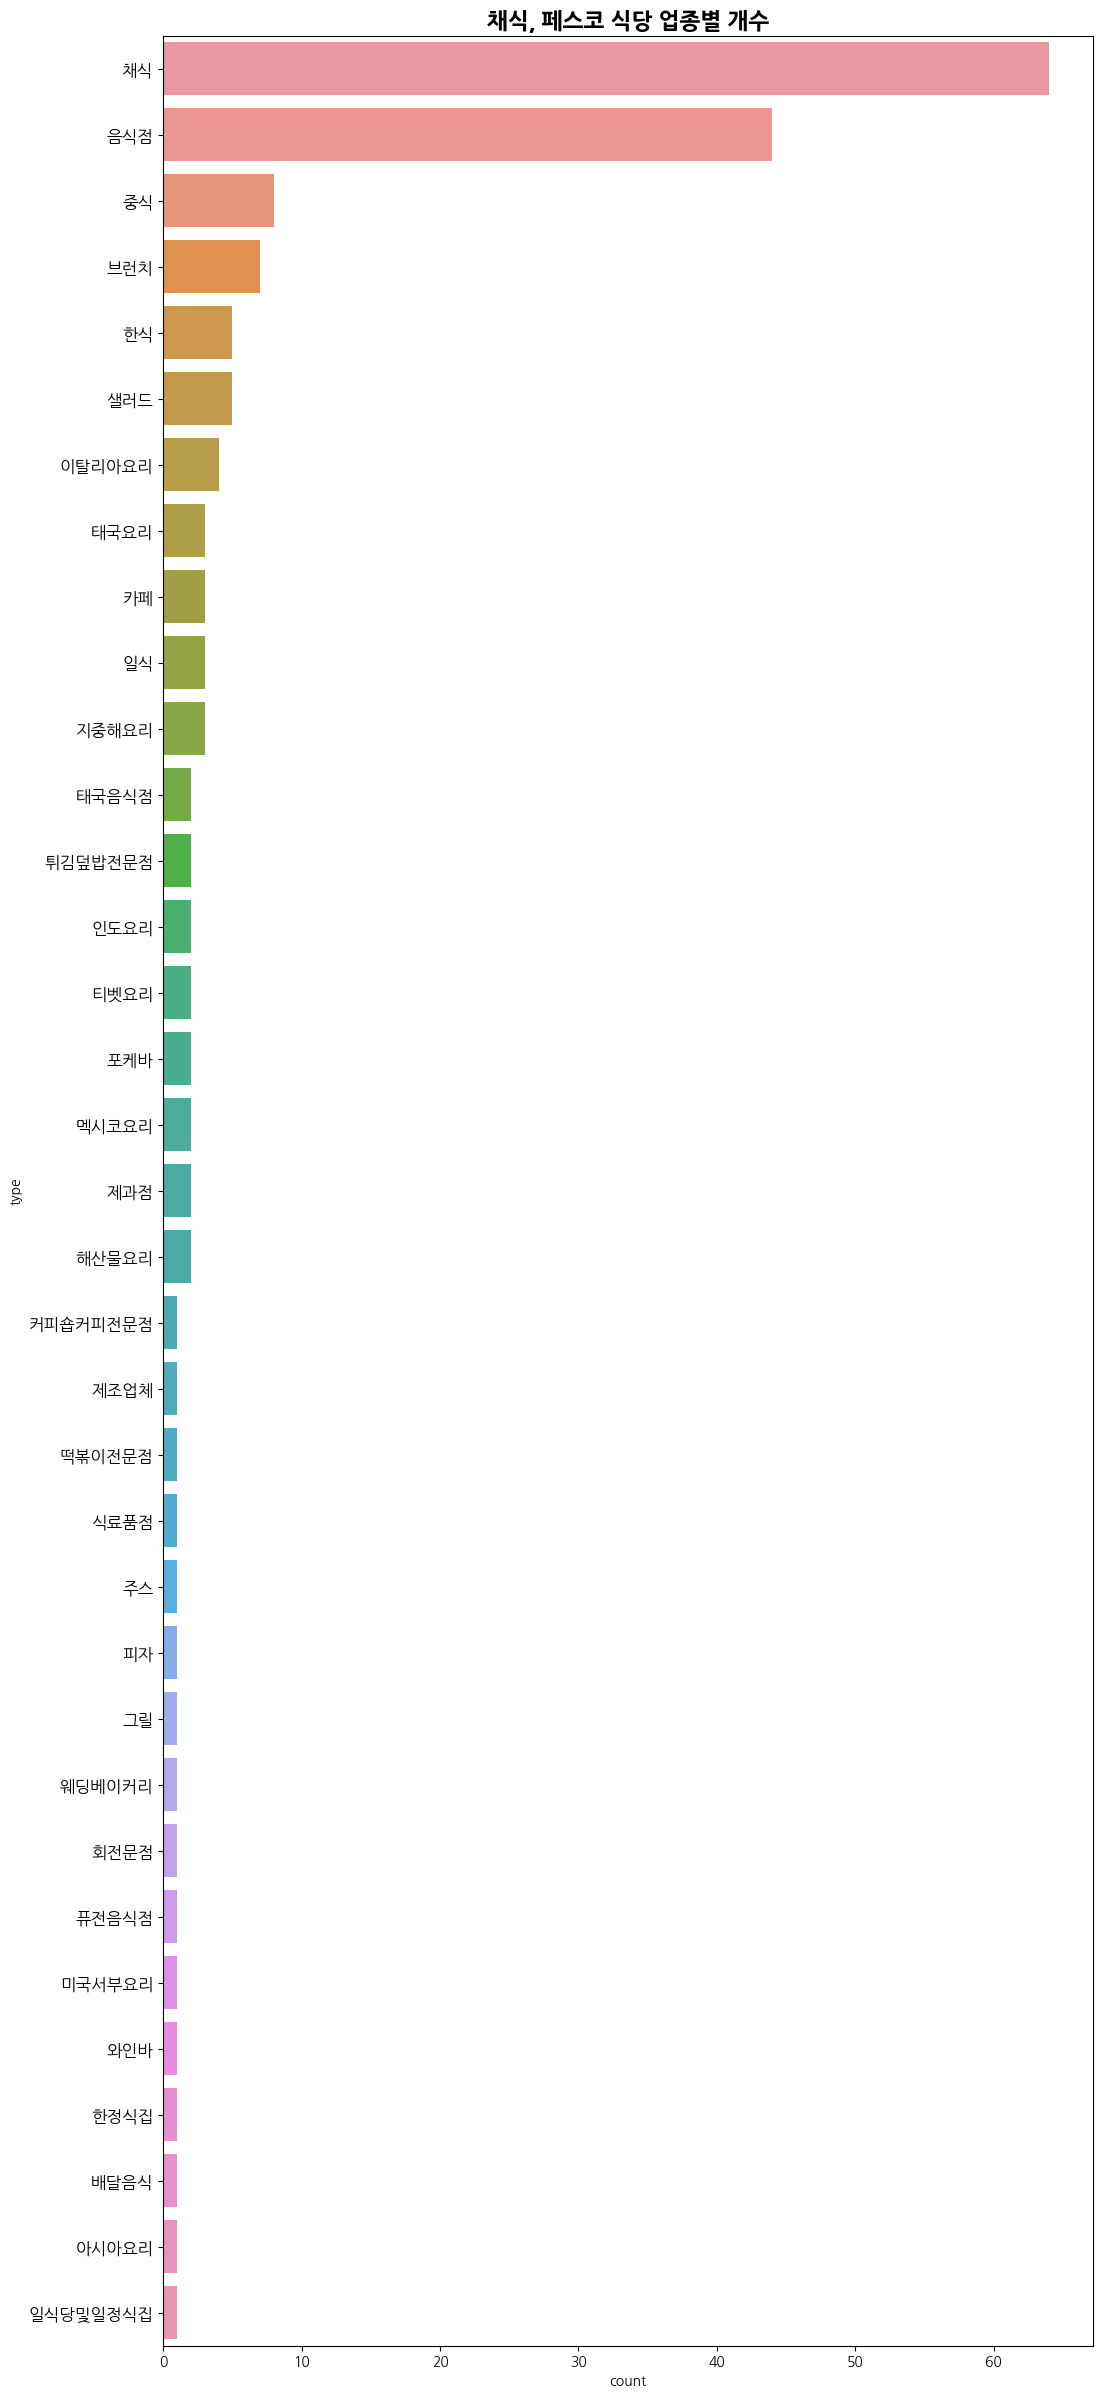

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family']='NanumGothic'
title_font={'fontsize':16,'fontweight':'bold'}

plt.figure(figsize=(12,30))
sns.countplot(y=df['type'],order=df['type'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('채식, 페스코 식당 업종별 개수',fontdict=title_font)
plt.show()

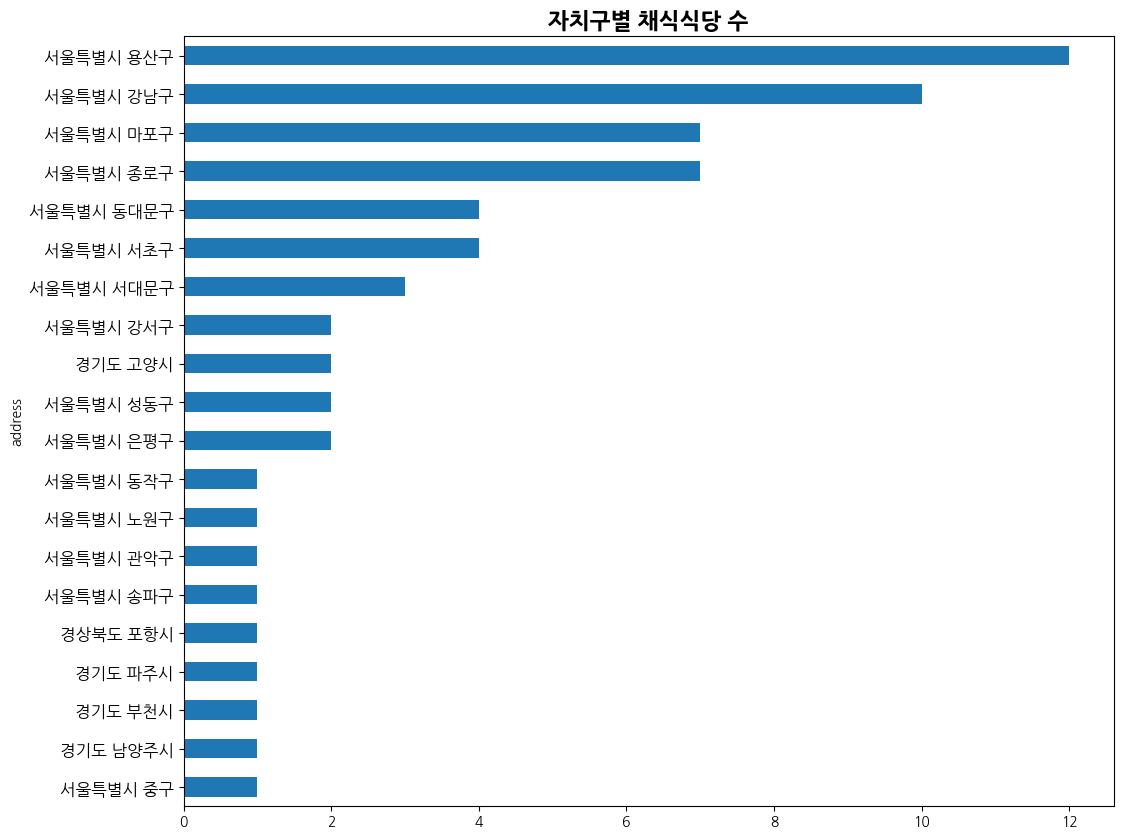

In [30]:
plt.figure(figsize=(12,10))
df.loc[df['type']=='채식'].groupby('address')['name'].count().sort_values().plot(kind='barh')
plt.yticks(fontsize=12)
plt.title('자치구별 채식식당 수',fontdict=title_font)
plt.show()

In [212]:
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [213]:
seoul_data=df.loc[df['address1']=='서울특별시'].groupby('address2')['name'].count()
seoul=df[df['address1']=='서울특별시']

In [214]:
bins=list(seoul_data.quantile([0,0.25,0.5,0.75,1]))
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

marker_cluster=MarkerCluster().add_to(m)

for lat, long in zip(seoul['lattitude'],seoul['longitude']):
    folium.Marker([lat,long],
                  popup=df['url'][i],
                  tooltip=df['name'][i],
                  icon=folium.Icon(color='green')).add_to(marker_cluster)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=seoul_data, 
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="서울 지역구별 채식가능 업종 수",
             bins=bins
            )
m

In [215]:
m.save('./data/map3.html')